# Lead scoring case study

- Predicting the probality of lead conversion using Logistic Regression Model
- Submitted by :  **Rafeek Ponnandy, Priyanka Chatterjee, Radhika Bansal**

## 1: Importing the dataset

In [1]:
# Supress warning
import warnings
warnings.filterwarnings ("ignore")

In [2]:
# importing pandas and numpy
import pandas as pd, numpy as np

In [3]:
#Reading input dataset
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking the dimensions of data
leads.shape

(9240, 37)

## 2: Inspecting the dataframe

In [5]:
# Checking the stats of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Checking the variable type and counts/nulls
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Checking missing values in the leads dataset
leads.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [8]:
# Checking the % of missing values
100*leads.isnull().mean().sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

**Identifying all columns having more than 30% of values missing values**

**We'll drop these columns due to high missing values by setting the threshold as 30%**

## 3. Data cleaning and preperation

In [9]:
# Identifying and dropping all columns having more than 30% of values missing values

Missing_cut_off = 30
columns_to_drop = list(leads.columns[100*leads.isnull().mean()>Missing_cut_off])
print("No. of cols to drop - ", len(columns_to_drop))
print(columns_to_drop)

No. of cols to drop -  6
['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [10]:
# removing all columns which cannot be considered for modelling due to higher missing values

leads.drop(columns_to_drop, axis =1,inplace=True)
leads.shape

(9240, 31)

In [11]:
# Once again Checking missing values in the leads dataset
leads.isnull().sum().sort_values(ascending = False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [12]:
# droping columns Prospect ID, Lead Number from the dataframe as they are not useful for the modelling

columns_to_drop = ['Prospect ID', 'Lead Number']
leads.drop(columns=columns_to_drop, axis=1, inplace=True)
leads.shape

(9240, 29)

In [13]:
# getting value counts of all remaining columns for further checks

for col in leads.columns:
    print(f"Value counts for the column '{col}':")
    print(leads[col].astype('category').value_counts(dropna=False))
    print("-----------------------------------------------------")

Value counts for the column 'Lead Origin':
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
-----------------------------------------------------
Value counts for the column 'Lead Source':
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
----------------------------------------------------

After the reviewing the value counts, below columns can be removed from the dataframe due to lack of variablity, These variables cannot signifacnaly contribute to explain the relationship between predictors and target variable

**'Do Not Call','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations', 'Receive More Updates About Our Courses','Update me on Supply Chain Content', 
'Get updates on DM Content','City','I agree to pay the amount through cheque'**

Column Country and City are also removed as they may not be usesul the model considering they may not have much influence

In [14]:
# columns are removed from the dataframe due to lack of variablity
# Column Country and City are also removed as they may not be usesul the model considering they may not have much influence

columns_to_remove = ['Do Not Call','Country','Search','Magazine','Newspaper Article',
                     'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                     'Receive More Updates About Our Courses','Update me on Supply Chain Content', 
                     'Get updates on DM Content','City','I agree to pay the amount through cheque']
leads.drop(columns=columns_to_remove, axis=1, inplace=True)
leads.shape

(9240, 15)

In [15]:
# Checking missing values in the leads dataset
leads.isnull().sum().sort_values(ascending = False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [16]:
# getting value counts of all remaining columns for further checks
for col in leads.columns:
    print(f"Value counts for the column '{col}':")
    print(leads[col].astype('category').value_counts(dropna=False))
    print("-----------------------------------------------------")

Value counts for the column 'Lead Origin':
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
-----------------------------------------------------
Value counts for the column 'Lead Source':
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
----------------------------------------------------

**There are several records with default value label 'select'  which is equvalent to missing**

Therefore all values 'Select' will need to be replaced as missing/NaN values thus it can be analysed and treated**

In [17]:
# Replacing 'Select' as missing/NaN values
leads.replace('Select', pd.NA, inplace=True)

In [18]:
# Checking missing values in the leads dataset
leads.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
Specialization                                   3380
What matters most to you in choosing a course    2709
What is your current occupation                  2690
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

**Columns 'How did you hear about X Education', 'Lead Profile  have quite some missing values' have many values with 'select' and therefore its better to drop them**

In [19]:
# dropiing cols How did you hear about X Education, Lead Profile  have quite some missing values / 'select'
leads.drop(columns=['How did you hear about X Education','Lead Profile'], axis=1, inplace=True)
leads.shape

(9240, 13)

**Getting value counts of 'What matters most to you in choosing a course' this column has high missing value**

In [20]:
# Getting value counts from column 'What matters most to you in choosing a course'
print(leads['What matters most to you in choosing a course'].astype('category').value_counts(dropna=False))

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64


In [21]:
# dropping column 'What matters most to you in choosing a course' as this column has mot much variablity 
leads.drop(columns=['What matters most to you in choosing a course'], axis=1, inplace=True)
leads.shape

(9240, 12)

In [22]:
# getting value counts of 'Specialization' this column has high missing values 

print(leads['Specialization'].astype('category').value_counts(dropna=False))

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64


- We'll pehaps create a missing category for this variable as this column might help explain the model

- We'll not remove missing records as the missing number is high and we might loose many records

In [23]:
# Checkin the value counts in the column 'What is your current occupation'
print(leads['What is your current occupation'].astype('category').value_counts(dropna=False))

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64


In [24]:
# Removing all missing values
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [25]:
leads.shape

(6550, 12)

In [26]:
# Checking the variable type and counts/nulls again
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6550 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6550 non-null   object 
 1   Lead Source                             6514 non-null   object 
 2   Do Not Email                            6550 non-null   object 
 3   Converted                               6550 non-null   int64  
 4   TotalVisits                             6420 non-null   float64
 5   Total Time Spent on Website             6550 non-null   int64  
 6   Page Views Per Visit                    6420 non-null   float64
 7   Last Activity                           6447 non-null   object 
 8   Specialization                          4603 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  A free copy of Mastering The Interview  6550 non-null   object 
 

In [27]:
# Colum TotalVisits have missing values and therefore removing all rows where TotalVisits is missing
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [28]:
# Checking missing values in the leads dataset
leads.isnull().sum().sort_values(ascending = False)

Specialization                            1878
Lead Source                                 29
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [29]:
# Checking missing values in the leads dataset once again
leads.isnull().sum().sort_values(ascending = False)

Specialization                            1878
Lead Source                                 29
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [30]:
leads.shape

(6420, 12)

In [31]:
print(100* (len(leads.index)/9240))

69.48051948051948


**We are now left with 69% of records after removing missing columns / rows**

- remaing colums with missing values are categorical columns, since we lost some signifact number of records and columns
- we can perhaps retain the nulls by create a missing category

In [32]:
# Identify categorical columns
categorical_columns = leads.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

# Impute missing values in categorical columns with the new category 'missing'
leads[categorical_columns] = leads[categorical_columns].fillna('missing')


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [33]:
# Checking missing values in the leads dataset
leads.isnull().sum().sort_values(ascending = False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [34]:
# getting value counts of all remaining columns for further checks
for col in leads.columns:
    print(f"Value counts for the column '{col}':")
    print(leads[col].astype('category').value_counts(dropna=False))
    print("-----------------------------------------------------")

Value counts for the column 'Lead Origin':
Lead Origin
Landing Page Submission    3644
API                        2140
Lead Add Form               608
Lead Import                  28
Name: count, dtype: int64
-----------------------------------------------------
Value counts for the column 'Lead Source':
Lead Source
Google               2048
Direct Traffic       1891
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
missing                29
Facebook               28
Click2call              4
bing                    3
Live Chat               2
Social Media            2
Press_Release           1
WeLearn                 1
Pay per Click Ads       1
testone                 1
Name: count, dtype: int64
-----------------------------------------------------
Value counts for the column 'Do Not Email':
Do Not Email
No     5966
Yes     454
Name: count, dtype: int64
-----------------------------------------------------

In [35]:
# checking the cleaned dataframe
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,missing,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,missing,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,missing,Unemployed,No,Modified


- Now that the data cleaning step is complete we need to prepare the data for modelling by converting categorical to dummy variables using pd.getd_dummies methode

## 4. Creating Dummy variables

In [36]:
# Creating dummy variable using pandas get_dummies for the following colums 
dummy = pd.get_dummies(leads[['Lead Origin', 'Do Not Email', 'Last Activity',
                              'A free copy of Mastering The Interview', 'What is your current occupation',
                              'Last Notable Activity']], drop_first=True).astype(int)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)


In [37]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,missing,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,missing,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,missing,Unemployed,...,0,0,0,1,0,0,0,0,0,0


**We'll create dummy variables seperately for Specialization, Lead Source as they have a missing category which can be dropped instead of dropping default column**

In [38]:
# Dummy variable creation for the variable Specialization

dummy_sp = pd.get_dummies(leads['Specialization'], prefix = 'Specialization').astype(int)
dummy_sp = dummy_sp.drop(['Specialization_missing'], axis = 1)
leads = pd.concat([leads, dummy_sp], axis = 1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,missing,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,missing,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,missing,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Dummy variable creation for the variable Lead Source
dummy_oc = pd.get_dummies(leads['Lead Source'], prefix = 'Source').astype(int)
dummy_oc = dummy_oc.drop(['Source_missing'], axis = 1)
leads = pd.concat([leads, dummy_oc], axis = 1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Source_Organic Search,Source_Pay per Click Ads,Source_Press_Release,Source_Reference,Source_Referral Sites,Source_Social Media,Source_WeLearn,Source_Welingak Website,Source_bing,Source_testone
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,missing,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,missing,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,missing,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Drop the columns for which the dummy variables have been created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [41]:
# Checking the detailed info of dataframe after dummy columns are added 
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6420 entries, 0 to 9239
Data columns (total 76 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6420 non-null   int64  
 1   TotalVisits                                           6420 non-null   float64
 2   Total Time Spent on Website                           6420 non-null   int64  
 3   Page Views Per Visit                                  6420 non-null   float64
 4   Lead Origin_Landing Page Submission                   6420 non-null   int32  
 5   Lead Origin_Lead Add Form                             6420 non-null   int32  
 6   Lead Origin_Lead Import                               6420 non-null   int32  
 7   Do Not Email_Yes                                      6420 non-null   int32  
 8   Last Activity_Converted to Lead                       6420 non-

In [42]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Source_Organic Search,Source_Pay per Click Ads,Source_Press_Release,Source_Reference,Source_Referral Sites,Source_Social Media,Source_WeLearn,Source_Welingak Website,Source_bing,Source_testone
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**We can proceed with the modelling as the data has been prepared well, including the dummy variables**

- The next step is to create the test -train split

## 5. Creating Test-Train split

In [43]:
# Import the required library
from sklearn.model_selection import train_test_split

In [44]:
# X and Y variables

X = leads.drop(['Converted'],axis =1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Source_Organic Search,Source_Pay per Click Ads,Source_Press_Release,Source_Reference,Source_Referral Sites,Source_Social Media,Source_WeLearn,Source_Welingak Website,Source_bing,Source_testone
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# X and Y variables

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 6.Feature scaling

 - There are numerical columns in the data, the values are at different scales. these can be scaled using MinMax scaler

In [47]:
# imporing minmax MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Source_Organic Search,Source_Pay per Click Ads,Source_Press_Release,Source_Reference,Source_Referral Sites,Source_Social Media,Source_WeLearn,Source_Welingak Website,Source_bing,Source_testone
6630,0.047619,0.084332,0.133333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8176,0.047619,0.154461,0.066667,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4978,0.095238,0.498447,0.266667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7457,0.119048,0.085664,0.333333,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4383,0.142857,0.234798,0.400000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Checking Correlation

- We need look at the correlations. Since the number of variables are pretty high
- we'll plot a heatmap however we may need to look at the table instead of plotting a heatmap

In [49]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

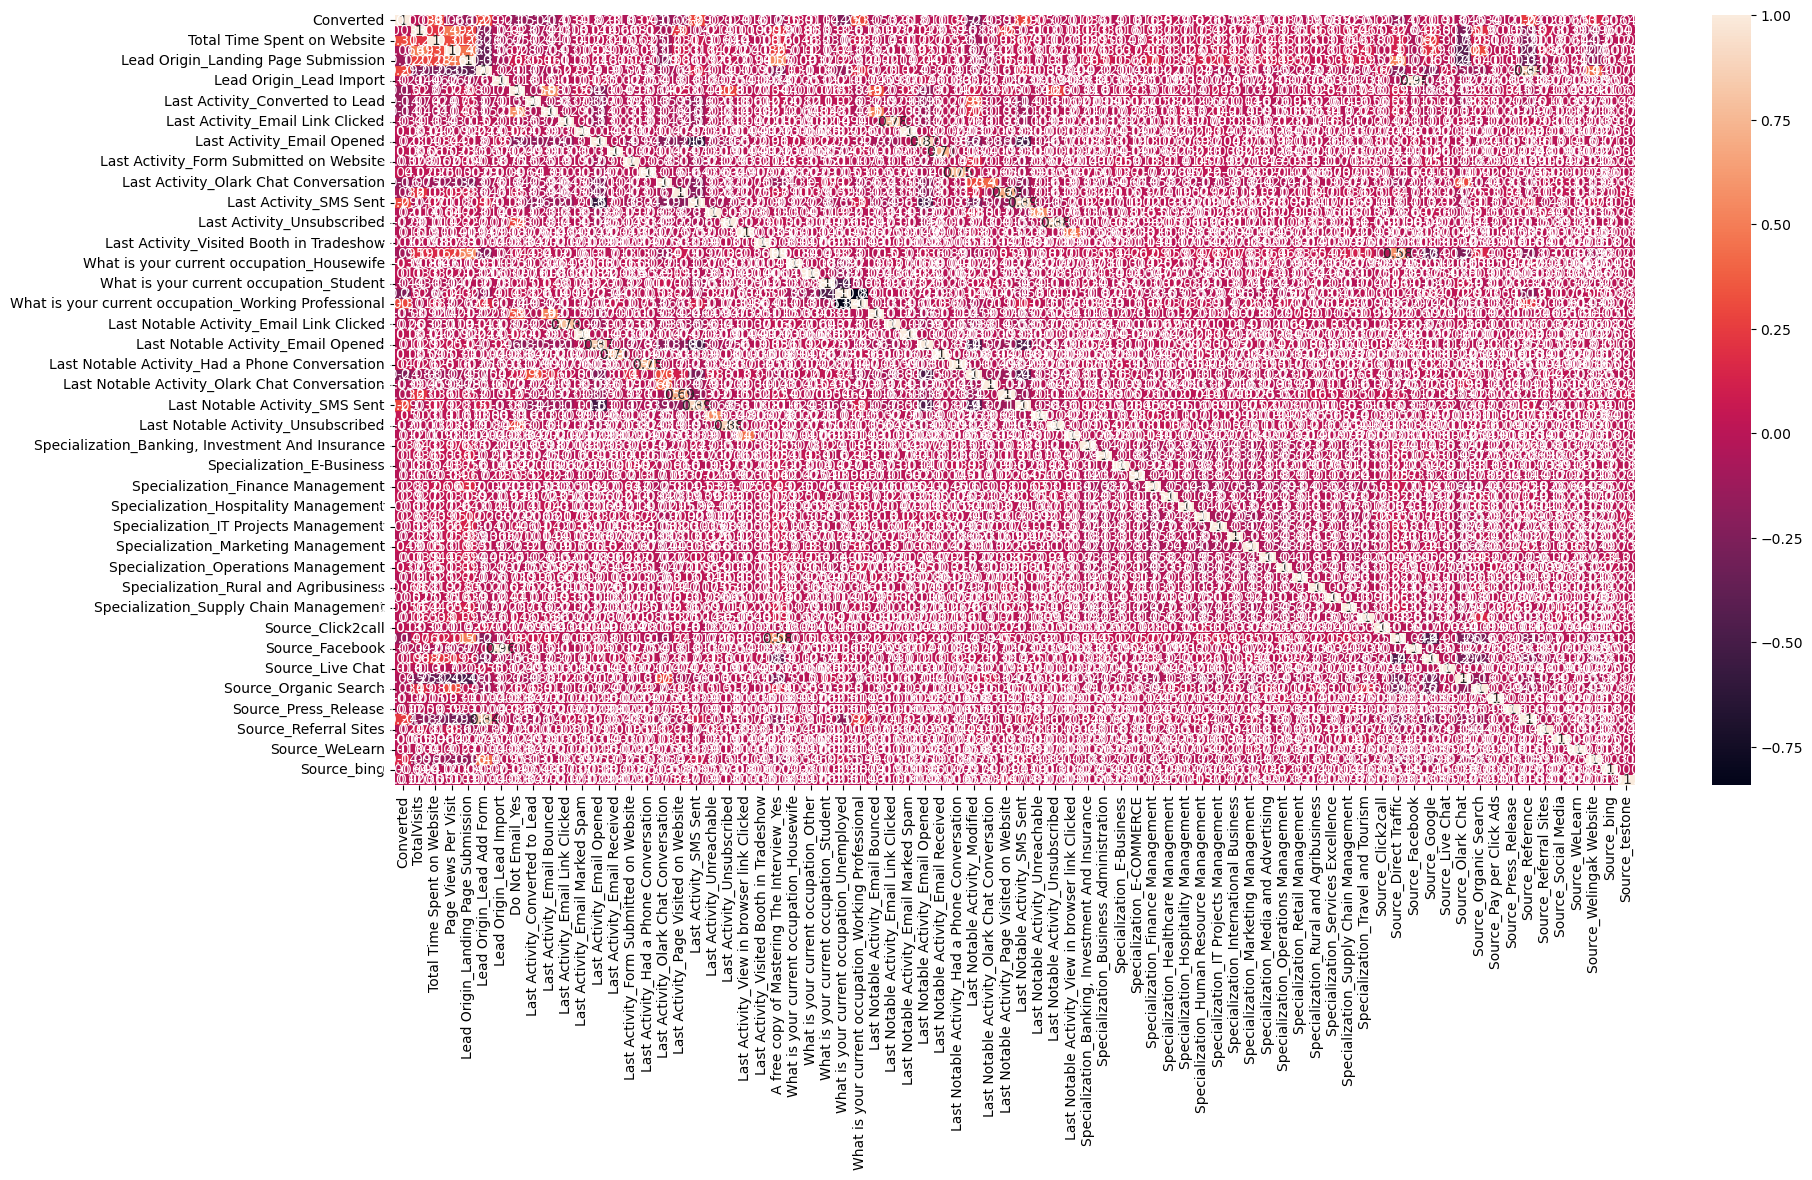

In [50]:
# plotting the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [51]:
# correlation table as the graph is not readable
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Source_Organic Search,Source_Pay per Click Ads,Source_Press_Release,Source_Reference,Source_Referral Sites,Source_Social Media,Source_WeLearn,Source_Welingak Website,Source_bing,Source_testone
Converted,1.000000,0.003768,0.308064,-0.065912,-0.122992,0.294135,-0.021199,-0.146640,-0.140494,-0.138829,...,-0.034495,-0.012027,-0.012027,0.241944,-0.023528,0.000655,0.012953,0.144165,-0.006410,-0.012027
TotalVisits,0.003768,1.000000,0.204907,0.490990,0.269346,-0.212844,-0.043604,0.023375,-0.073554,-0.042843,...,0.193668,-0.001497,0.005937,-0.179064,0.078483,-0.003869,-0.003975,-0.096293,-0.004024,0.003459
Total Time Spent on Website,0.308064,0.204907,1.000000,0.306873,0.277996,-0.255763,-0.062083,-0.057194,-0.023970,-0.041090,...,0.080518,-0.009006,-0.003858,-0.212917,0.018096,0.000637,0.014393,-0.118541,-0.012412,-0.005051
Page Views Per Visit,-0.065912,0.490990,0.306873,1.000000,0.459474,-0.346526,-0.066639,0.028300,-0.070247,-0.040263,...,0.302435,0.003071,0.020355,-0.290878,0.085774,0.000269,-0.002690,-0.155764,-0.001334,0.000190
Lead Origin_Landing Page Submission,-0.122992,0.269346,0.277996,0.459474,1.000000,-0.370568,-0.075830,0.080101,0.050959,0.060704,...,0.040590,0.010894,0.010894,-0.311917,-0.071895,-0.002409,0.010894,-0.164064,0.004324,0.010894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Source_Social Media,0.000655,-0.003869,0.000637,0.000269,-0.002409,-0.005710,-0.001168,-0.004870,-0.003881,-0.003024,...,-0.006989,-0.000220,-0.000220,-0.004806,-0.001919,1.000000,-0.000220,-0.002528,-0.000382,-0.000220
Source_WeLearn,0.012953,-0.003975,0.014393,-0.002690,0.010894,-0.004037,-0.000826,-0.003443,-0.002744,-0.002138,...,-0.004942,-0.000156,-0.000156,-0.003398,-0.001357,-0.000220,1.000000,-0.001787,-0.000270,-0.000156
Source_Welingak Website,0.144165,-0.096293,-0.118541,-0.155764,-0.164064,0.442737,-0.009478,0.008130,-0.031482,-0.017858,...,-0.056695,-0.001787,-0.001787,-0.038985,-0.015569,-0.002528,-0.001787,1.000000,-0.003096,-0.001787
Source_bing,-0.006410,-0.004024,-0.012412,-0.001334,0.004324,-0.006993,-0.001431,-0.005965,-0.004754,-0.003704,...,-0.008561,-0.000270,-0.000270,-0.005886,-0.002351,-0.000382,-0.000270,-0.003096,1.000000,-0.000270


## 7. Model building

- We'll proceed with the model building
- considering the high number of variables we'll use RFE to chose the top variables

In [52]:
# Import 'LogisticRegression' and creating a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [53]:
#Importing RFE
from sklearn.feature_selection import RFE

In [54]:
# selecting features using RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [55]:
# List of all features from RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 51),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 41),
 ('Last Activity_Email Marked Spam', False, 43),
 ('Last Activity_Email Opened', False, 50),
 ('Last Activity_Email Received', False, 60),
 ('Last Activity_Form Submitted on Website', False, 13),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 56),
 ('Last Activity_Unsubscribed', False, 38),
 ('Last Activity_View in browser link Clicked', False, 30),
 ('Last Activity_Visited Booth in Tradeshow'

In [56]:
# Checking variables selcted by RFE
X_train.columns[rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable', 'Source_Olark Chat',
       'Source_Welingak Website'],
      dtype='object')

In [57]:
# Assigning all selected columns to col variable
col = X_train.columns[rfe.support_]

In [58]:
# Selecting only the columns selected by RFE
X_train = X_train[col]

In [59]:
# Import statsmodels
import statsmodels.api as sm

In [60]:
# Fit a logistic Regression model on X_train, also adding a constant

X_train_sm = sm.add_constant(X_train)
logRm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logRm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4478
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.6
Date:                Sat, 27 Jul 2024   Deviance:                       4063.2
Time:                        13:27:47   Pearson chi2:                 4.74e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3815
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0560      0.115    -17.910      0.000      -2.281      -1.831
TotalVisits                                              2.9935      0.600      4.990      0.000       1.818       4.169
Total Time Spent on Website                              4.5718      0.187     24.436      0.000       4.205       4.938
Page Views Per Visit                                    -1.5406      0.413     -3.731      0.000      -2.350      -0.731
Lead Origin_Lead Add Form                                3.8978      0.258     15.088      0.000       3.391       4.404
Do Not Email_Yes                                        -1.4042      0.214     -6.564      0.000      -1.823      -0.985
Last Activity_Converted to Lead                         -1.1047      0.233     -4.734      0.000      -1.562      -0.647
Last Activity_Email Bounced                             -1.0728      0.449     -2.390      0.017      -1.953      -0.193
Last Activity_Had a Phone Conversation                   0.6008      0.864      0.695      0.487      -1.094       2.295
Last Activity_Olark Chat Conversation                   -1.2024      0.188     -6.380      0.000      -1.572      -0.833
Last Activity_SMS Sent                                   1.1811      0.086     13.724      0.000       1.012       1.350
What is your current occupation_Working Professional     2.4937      0.191     13.039      0.000       2.119       2.869
Last Notable Activity_Had a Phone Conversation          22.5588   1.29e+04      0.002      0.999   -2.53e+04    2.53e+04
Last Notable Activity_Unreachable                        2.7496      0.798      3.445      0.001       1.185       4.314
Source_Olark Chat                                        1.4835      0.141     10.554      0.000       1.208       1.759
Source_Welingak Website                                  2.2874      1.047      2.185      0.029       0.235       4.340
========================================================================================================================
"""

- Variable 'Last Notable Activity_Had a Phone Conversation', 'Last Activity_Had a Phone Conversation' has higher P value 

In [61]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.09
0,TotalVisits,3.55
7,Last Activity_Had a Phone Conversation,2.13
11,Last Notable Activity_Had a Phone Conversation,2.13
1,Total Time Spent on Website,2.03
4,Do Not Email_Yes,1.67
6,Last Activity_Email Bounced,1.62
9,Last Activity_SMS Sent,1.62
3,Lead Origin_Lead Add Form,1.49
14,Source_Welingak Website,1.32


- All VIF values seem to be under 5
- We can remove variable occupation_Housewife as that high p-value observed

In [63]:
# Droping the column 'Last Notable Activity_Had a Phone Conversation'
X_train_sm.drop(['Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [64]:
# Fit a logistic Regression model on X_train, also adding a constant

logRm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logRm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4479
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2035.4
Date:                Sat, 27 Jul 2024   Deviance:                       4070.7
Time:                        13:27:47   Pearson chi2:                 4.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3804
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0578      0.115    -17.933      0.000      -2.283      -1.833
TotalVisits                                              3.0001      0.599      5.009      0.000       1.826       4.174
Total Time Spent on Website                              4.5620      0.187     24.410      0.000       4.196       4.928
Page Views Per Visit                                    -1.5206      0.412     -3.692      0.000      -2.328      -0.713
Lead Origin_Lead Add Form                                3.8964      0.258     15.080      0.000       3.390       4.403
Do Not Email_Yes                                        -1.4038      0.214     -6.565      0.000      -1.823      -0.985
Last Activity_Converted to Lead                         -1.1020      0.233     -4.725      0.000      -1.559      -0.645
Last Activity_Email Bounced                             -1.0705      0.449     -2.386      0.017      -1.950      -0.191
Last Activity_Had a Phone Conversation                   2.1501      0.703      3.059      0.002       0.773       3.528
Last Activity_Olark Chat Conversation                   -1.2018      0.188     -6.379      0.000      -1.571      -0.833
Last Activity_SMS Sent                                   1.1805      0.086     13.724      0.000       1.012       1.349
What is your current occupation_Working Professional     2.4917      0.191     13.029      0.000       2.117       2.866
Last Notable Activity_Unreachable                        2.7480      0.798      3.443      0.001       1.184       4.312
Source_Olark Chat                                        1.4853      0.141     10.571      0.000       1.210       1.761
Source_Welingak Website                                  2.2903      1.047      2.187      0.029       0.238       4.342
========================================================================================================================
"""

## 8. Model Evaluation

- Now all P-Values look fine, also the variables are checked with VIF. We can now make prediction using the final set of features selected

In [65]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6630    0.150208
8176    0.074921
4978    0.781912
7457    0.139827
4383    0.237520
4152    0.647491
406     0.689026
8992    0.055150
1504    0.386772
66      0.875071
dtype: float64

In [66]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head(10)

,Converted,Conversion_Prob
6630,0,0.150208
8176,0,0.074921
4978,0,0.781912
7457,0,0.139827
4383,0,0.237520
4152,0,0.647491
406,1,0.689026
8992,0,0.055150
1504,0,0.386772
66,1,0.875071


In [67]:
# Creating a new column as 0 or 1, 1 if probability is more than 50%, an arbitrary cut-off

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
6630,0,0.150208,0
8176,0,0.074921,0
4978,0,0.781912,1
7457,0,0.139827,0
4383,0,0.237520,0


### Evaluate the model using Metrics

In [68]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [69]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7928348909657321


- Model accuracy is close to **80%**

In [70]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[1949,  392],
       [ 539, 1614]], dtype=int64)

In [71]:
# Actual/Predicted      -ve       +ve
        # Act -ve       1949      392
        # Act +ve       539       1614  

In [72]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Calculate the sensitivity (Recall)
TP/(TP+FN)

0.7496516488620529

In [74]:
# Calculate the specificity

TN/(TN+FP)

0.8325501922255446

With arbitrary cut-off of 50%
**Sensitivity (Recall) is 75%** and
**Specificity is 83%**

- Now we need to find out the optimal threshold for a better model performance
- We'll plot ROC curve to find the AUC

### Finding the optimal cutoff point

In [75]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [76]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [77]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

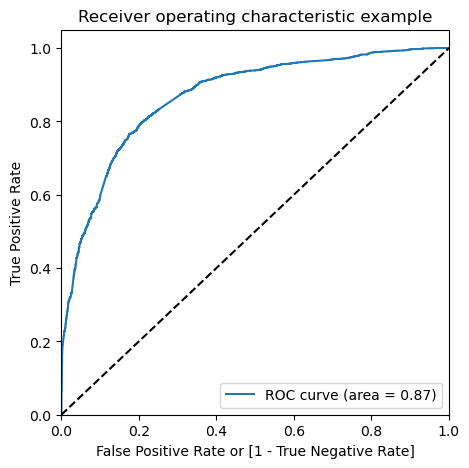

In [78]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- The area under the ROC curve is 0.87, which denotes a good model. 
- We need to find out the optimal cut-off point by checking the accuracy at different cut-offs 
- We'll do further checks on model sensitivity and specificity and find the optimal cut-off point

In [79]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6630,0,0.150208,0,1,1,0,0,0,0,0,0,0,0
8176,0,0.074921,0,1,0,0,0,0,0,0,0,0,0
4978,0,0.781912,1,1,1,1,1,1,1,1,1,0,0
7457,0,0.139827,0,1,1,0,0,0,0,0,0,0,0
4383,0,0.237520,0,1,1,1,0,0,0,0,0,0,0


In [80]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.479083  1.000000  0.000000
0.1   0.1  0.557855  0.991175  0.159334
0.2   0.2  0.718959  0.937761  0.517727
0.3   0.3  0.765243  0.909893  0.632208
0.4   0.4  0.792390  0.810033  0.776164
0.5   0.5  0.792835  0.749652  0.832550
0.6   0.6  0.783044  0.686020  0.872277
0.7   0.7  0.743881  0.551788  0.920547
0.8   0.8  0.716066  0.457966  0.953439
0.9   0.9  0.647530  0.281003  0.984622


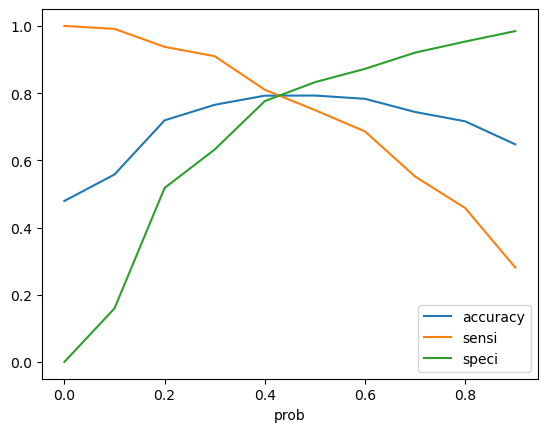

In [81]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**at around 42% the model yields the most optimal performance and thefore we'll use this as the threshold*

In [82]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
6630,0,0.150208,0,1,1,0,0,0,0,0,0,0,0,0
8176,0,0.074921,0,1,0,0,0,0,0,0,0,0,0,0
4978,0,0.781912,1,1,1,1,1,1,1,1,1,0,0,1
7457,0,0.139827,0,1,1,0,0,0,0,0,0,0,0,0
4383,0,0.237520,0,1,1,1,0,0,0,0,0,0,0,0


In [83]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7939474855362706

In [84]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

# Prev result
# Actual/Predicted      -ve       +ve
        # Act -ve       1949      392
        # Act +ve       539       1614  

array([[1850,  491],
       [ 435, 1718]], dtype=int64)

In [85]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Calculate the sensitivity (Recall)
TP/(TP+FN)

0.7979563399907106

In [87]:
# Calculate the specificity

TN/(TN+FP)

0.7902605724049552

In [88]:
# Calculate the Precision

TP/(TP+FP)

0.7777274784970575

Models performance is as below
With cut-off of 42%

**Sensitivity (Recall) has increased to 79.7%** and

**Specificity is 79%**

**Precision is 77.7%**

## 9. Making Prediction on the test set

- We'll predict the test set

In [89]:
#Scaling the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [90]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Source_Organic Search,Source_Pay per Click Ads,Source_Press_Release,Source_Reference,Source_Referral Sites,Source_Social Media,Source_WeLearn,Source_Welingak Website,Source_bing,Source_testone
4051,0.095238,0.676431,0.133333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1696,0.071429,0.356414,0.200000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1325,0.214286,0.536174,0.600000,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7991,0.071429,0.764314,0.100000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8177,0.071429,0.456724,0.200000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Select the same columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,Source_Olark Chat,Source_Welingak Website
4051,0.095238,0.676431,0.133333,0,0,0,0,0,0,0,0,0,0,0,0
1696,0.071429,0.356414,0.200000,0,1,0,0,0,0,0,0,0,0,0,0
1325,0.214286,0.536174,0.600000,0,0,0,0,0,0,0,0,0,0,0,0
7991,0.071429,0.764314,0.100000,0,0,0,0,0,0,1,0,0,0,0,0
8177,0.071429,0.456724,0.200000,0,0,0,0,0,0,1,0,0,0,0,0


In [92]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [93]:
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,Source_Olark Chat,Source_Welingak Website
4051,1.0,0.095238,0.676431,0.133333,0,0,0,0,0,0,0,0,0,0,0,0
1696,1.0,0.071429,0.356414,0.200000,0,1,0,0,0,0,0,0,0,0,0,0
1325,1.0,0.214286,0.536174,0.600000,0,0,0,0,0,0,0,0,0,0,0,0
7991,1.0,0.071429,0.764314,0.100000,0,0,0,0,0,0,1,0,0,0,0,0
8177,1.0,0.071429,0.456724,0.200000,0,0,0,0,0,0,1,0,0,0,0,0


In [94]:
# Drop columns which are not required  from X_test as well

X_test_sm.drop(['Last Notable Activity_Had a Phone Conversation'],axis=1,inplace = True)

In [95]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [96]:
y_test_pred[:10]

4051    0.752322
1696    0.127255
1325    0.529644
7991    0.935338
8177    0.753330
404     0.687306
6682    0.047753
5575    0.862779
5930    0.109723
8723    0.160296
dtype: float64

In [97]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4051,0.752322
1696,0.127255
1325,0.529644
7991,0.935338
8177,0.753330


In [98]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [99]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [100]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [101]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.752322
1,1,0.127255
2,0,0.529644
3,0,0.935338
4,1,0.753330


In [102]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.752322
1,1,0.127255
2,0,0.529644
3,0,0.935338
4,1,0.753330


In [103]:
# Make predictions on the test set using 0.38 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [104]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.752322,1
1,1,0.127255,0
2,0,0.529644,1
3,0,0.935338,1
4,1,0.753330,1


In [105]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7798546209761164

**Model has the accuracy of 77% on the test set which is good**

In [106]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[757, 231],
       [193, 745]], dtype=int64)

In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [108]:
# Calculate sensitivity
TP / float(TP+FN)

0.7942430703624733

In [109]:
# Calculate the specificity

TN/(TN+FP)

0.7661943319838057

In [110]:
# Calculate the Precision

TP/(TP+FP)

0.7633196721311475

Models performance on the test set:

**Sensitivity (Recall) 79%** and

**Specificity is 76%**

**Precision is 76%**

## 10.Precision and Recall view

- We'll build the model using precison and recall trade-off to find the optimal threshold

In [111]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1949,  392],
       [ 539, 1614]], dtype=int64)

#### Precision
TP / TP + FP

In [112]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8045862412761715

#### Recall
TP / TP + FN

In [113]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7496516488620529

### Precision Recall Trade off

In [114]:
from sklearn.metrics import precision_recall_curve

In [115]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

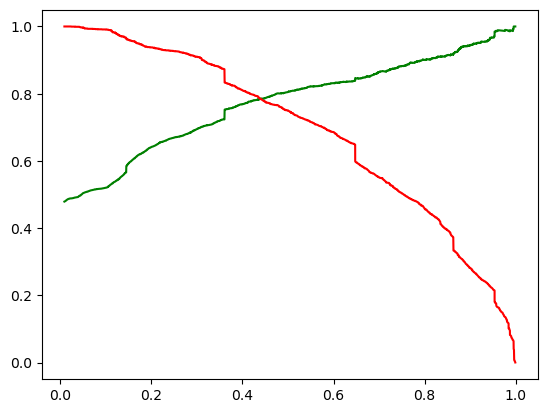

In [116]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
6630,0,0.150208,0,1,1,0,0,0,0,0,0,0,0,0
8176,0,0.074921,0,1,0,0,0,0,0,0,0,0,0,0
4978,0,0.781912,1,1,1,1,1,1,1,1,1,0,0,1
7457,0,0.139827,0,1,1,0,0,0,0,0,0,0,0,0
4383,0,0.237520,0,1,1,1,0,0,0,0,0,0,0,0


In [118]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7939474855362706

In [119]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1850,  491],
       [ 435, 1718]], dtype=int64)

In [120]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Calculate Precision

TP/(TP+FP)

0.7777274784970575

In [122]:
# Calculate Recall

TP/(TP+FN)

0.7979563399907106

### Prediction on test set

In [123]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4051    0.752322
1696    0.127255
1325    0.529644
7991    0.935338
8177    0.753330
404     0.687306
6682    0.047753
5575    0.862779
5930    0.109723
8723    0.160296
dtype: float64

In [124]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4051,0.752322
1696,0.127255
1325,0.529644
7991,0.935338
8177,0.753330


In [125]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [126]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [127]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.752322
1,1,0.127255
2,0,0.529644
3,0,0.935338
4,1,0.753330


In [128]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})


In [129]:
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.752322
1,1,0.127255
2,0,0.529644
3,0,0.935338
4,1,0.753330


In [130]:
# Make predictions on the test set using 0.43 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.752322,1
1,1,0.127255,0
2,0,0.529644,1
3,0,0.935338,1
4,1,0.753330,1


In [131]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7824506749740394

In [132]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[770, 218],
       [201, 737]], dtype=int64)

In [133]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# Calculate Precision

TP/(TP+FP)

0.7717277486910995

In [135]:
# Calculate Recall

TP/(TP+FN)

0.7857142857142857